In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-dataset/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].mean())

In [5]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
correlation = df.corr()["Outcome"].abs().sort_values(ascending=False)
correlation

Outcome                     1.000000
Glucose                     0.492908
BMI                         0.312254
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64

In [7]:
X_train_simple = X_train[["Glucose"]]
X_test_simple = X_test[["Glucose"]]

slr = LinearRegression()
slr.fit(X_train_simple, y_train)

y_pred_slr = slr.predict(X_test_simple)

In [8]:
slr_metrics = {
    "Model": "Simple Linear Regression",
    "MSE": mean_squared_error(y_test, y_pred_slr),
    "MAE": mean_absolute_error(y_test, y_pred_slr),
    "R2": r2_score(y_test, y_pred_slr)
}

In [9]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred_mlr = mlr.predict(X_test)

In [10]:
mlr_metrics = {
    "Model": "Multiple Linear Regression",
    "MSE": mean_squared_error(y_test, y_pred_mlr),
    "MAE": mean_absolute_error(y_test, y_pred_mlr),
    "R2": r2_score(y_test, y_pred_mlr)
}

In [11]:
regression_df = pd.DataFrame([slr_metrics, mlr_metrics])
regression_df

,Model,MSE,MAE,R2
0,Simple Linear Regression,0.170512,0.339431,0.257328
1,Multiple Linear Regression,0.164942,0.335090,0.281588


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [16]:
def classification_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

In [17]:
classification_df = pd.DataFrame([
    classification_metrics("Naive Bayes", y_test, y_pred_nb),
    classification_metrics("KNN", y_test, y_pred_knn),
    classification_metrics("Decision Tree", y_test, y_pred_dt)
])

classification_df

,Model,Accuracy,MSE,MAE,R2
0,Naive Bayes,0.753247,0.246753,0.246753,-0.074747
1,KNN,0.766234,0.233766,0.233766,-0.018182
2,Decision Tree,0.720779,0.279221,0.279221,-0.216162


In [18]:
reg_avg = regression_df[["MSE", "MAE", "R2"]].mean()
clf_avg = classification_df[["MSE", "MAE", "R2"]].mean()

comparison_df = pd.DataFrame({
    "Regression": reg_avg,
    "Classification": clf_avg
})

comparison_df

,Regression,Classification
MSE,0.167727,0.253247
MAE,0.337261,0.253247
R2,0.269458,-0.103030


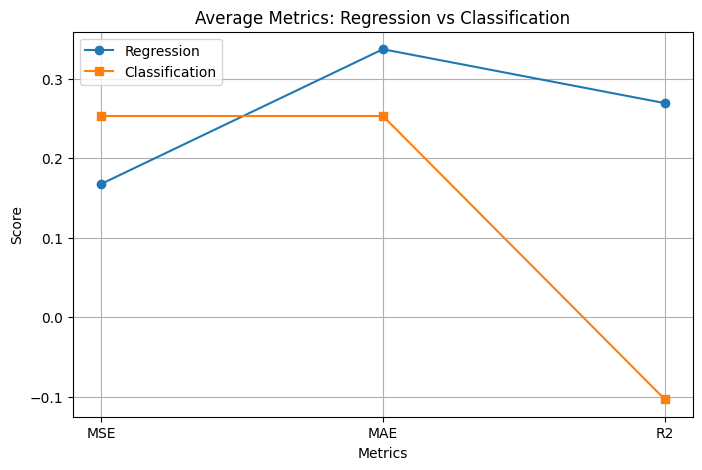

In [19]:
plt.figure(figsize=(8,5))
plt.plot(comparison_df.index, comparison_df["Regression"], marker="o", label="Regression")
plt.plot(comparison_df.index, comparison_df["Classification"], marker="s", label="Classification")

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Average Metrics: Regression vs Classification")
plt.legend()
plt.grid(True)
plt.show()

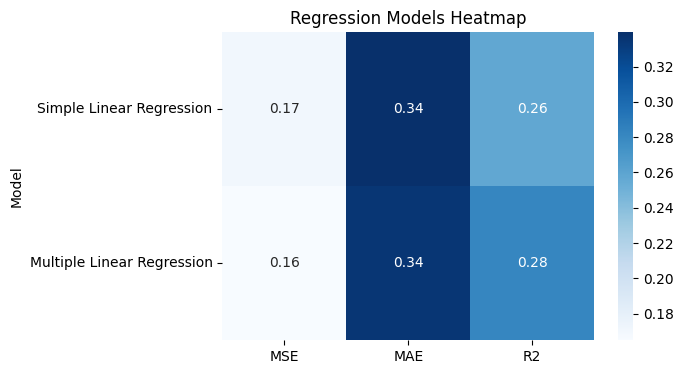

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(regression_df.set_index("Model"), annot=True, cmap="Blues")
plt.title("Regression Models Heatmap")
plt.show()

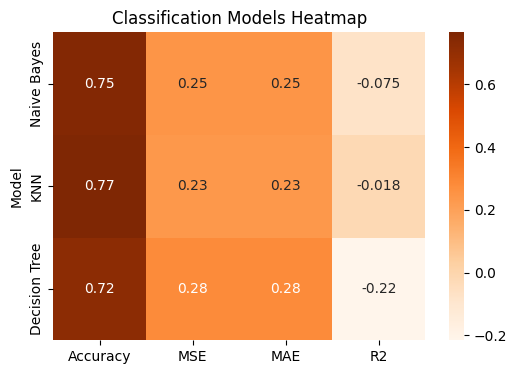

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(classification_df.set_index("Model"), annot=True, cmap="Oranges")
plt.title("Classification Models Heatmap")
plt.show()